# Preliminaries

Importing python packages and setting display parameters

In [1]:
import numpy as np
import pandas as pd
import itertools as it
import scipy.stats as stats

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import thesis_EAfunc as EAf
import thesis_visfunc as EAv

In [2]:
plt.style.use("bmh")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option("display.latex.repr", True)
pd.set_option("display.latex.longtable", True)

# Reading data

## Fitness results data

Reading the Data Frame from a pickle file

In [3]:
multi_fit = pd.read_pickle("./Data/TEST_A_2L_FitData.gz", compression="gzip")

Replicates in the sample

In [4]:
len(multi_fit) / (201)

1920.0

## DOE data and encoded values

In [5]:
doe = pd.read_pickle("./Data/TEST_A_DOE_data.gz", compression="gzip")
coded_values = pd.read_pickle("./Data/TEST_A_DOE_code.gz", compression="gzip")
coded_values

,Label,Variable type,Value_low,Value_high,encoded_low,encoded_high
Factor,,,,,,
pop_s,Population size,Numerical,10,160,-1,1
b,Progeny-to-population ratio,Numerical,0.5,5,-1,1
mut_p,Mutation Probability,Numerical (<1),0.1,0.9,-1,1
mut_s,Mutation size,Numerical,0.5,5,-1,1
p_sel,Parent selection,Categorical,uniform,tournament k3,-1,1
s_sel,Survivor selection method,Categorical,fitness proportional,uniform,-1,1


In [6]:
doe.head()

,pop_s,b,mut_p,mut_s,p_sel,s_sel,f_min,f_max,f_mean,f_std
0,-1,-1.0,-1.0,-1.0,-1,-1,1.062947,1.062947,1.062947,0.0
1,-1,-1.0,-1.0,-1.0,-1,-1,0.212610,0.212610,0.212610,0.0
2,-1,-1.0,-1.0,-1.0,-1,-1,0.175744,0.175744,0.175744,0.0
3,-1,-1.0,-1.0,-1.0,-1,-1,0.363683,0.363683,0.363683,0.0
4,-1,-1.0,-1.0,-1.0,-1,-1,0.274916,0.274916,0.274916,0.0


# Visualization of data

## Development of minimum (best) fitness

Fitness after each generation for each of the 1920 replicates

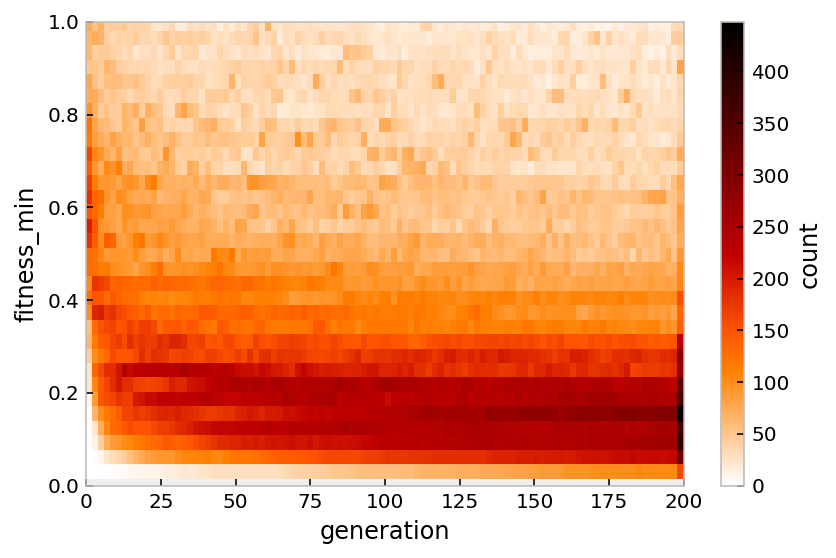

In [7]:
fig, ax = plt.subplots()
h = ax.hist2d(
    x="generation", y="fitness_min", bins=(100, 160), cmap="gist_heat_r", data=multi_fit
)
ax.set_xlabel("generation")
ax.set_ylabel("fitness_min")
ax.set_xlim(0, 200)
ax.set_ylim(0, 1)
cb = fig.colorbar(h[3], ax=ax)
cb.set_label("count")
plt.tight_layout()

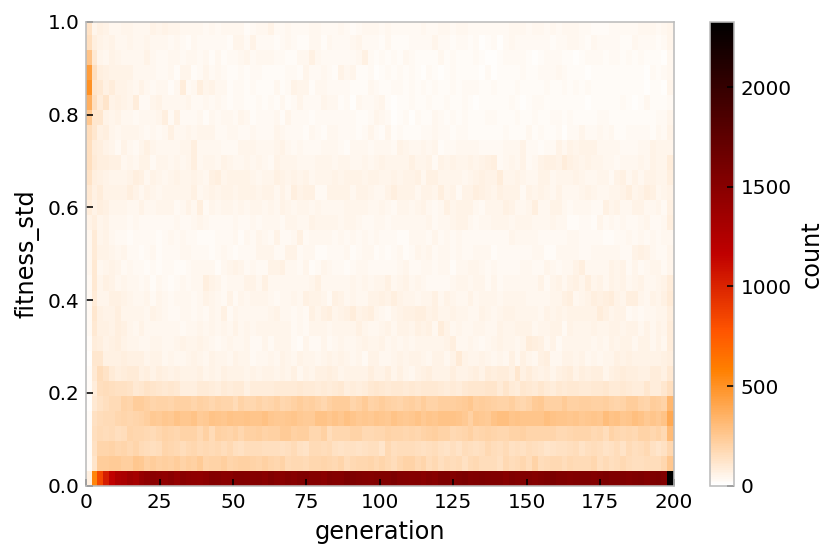

In [8]:
fig, ax = plt.subplots()
h = ax.hist2d(
    x="generation", y="fitness_std", bins=(100, 60), cmap="gist_heat_r", data=multi_fit
)
ax.set_xlabel("generation")
ax.set_ylabel("fitness_std")
ax.set_xlim(0, 200)
ax.set_ylim(0, 1)
cb = fig.colorbar(h[3], ax=ax)
cb.set_label("count")
plt.tight_layout()

Average value of minimum fitness for each generation

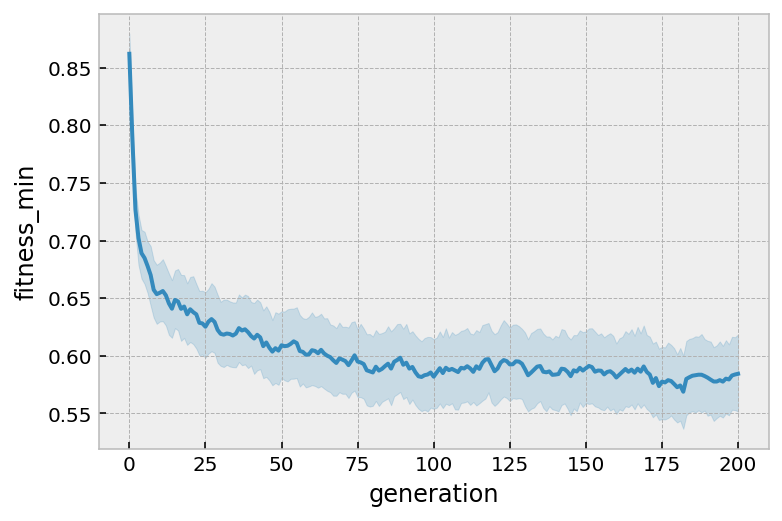

In [9]:
sns.lineplot(x="generation", y="fitness_min", data=multi_fit)

Wall time: 2min 32s


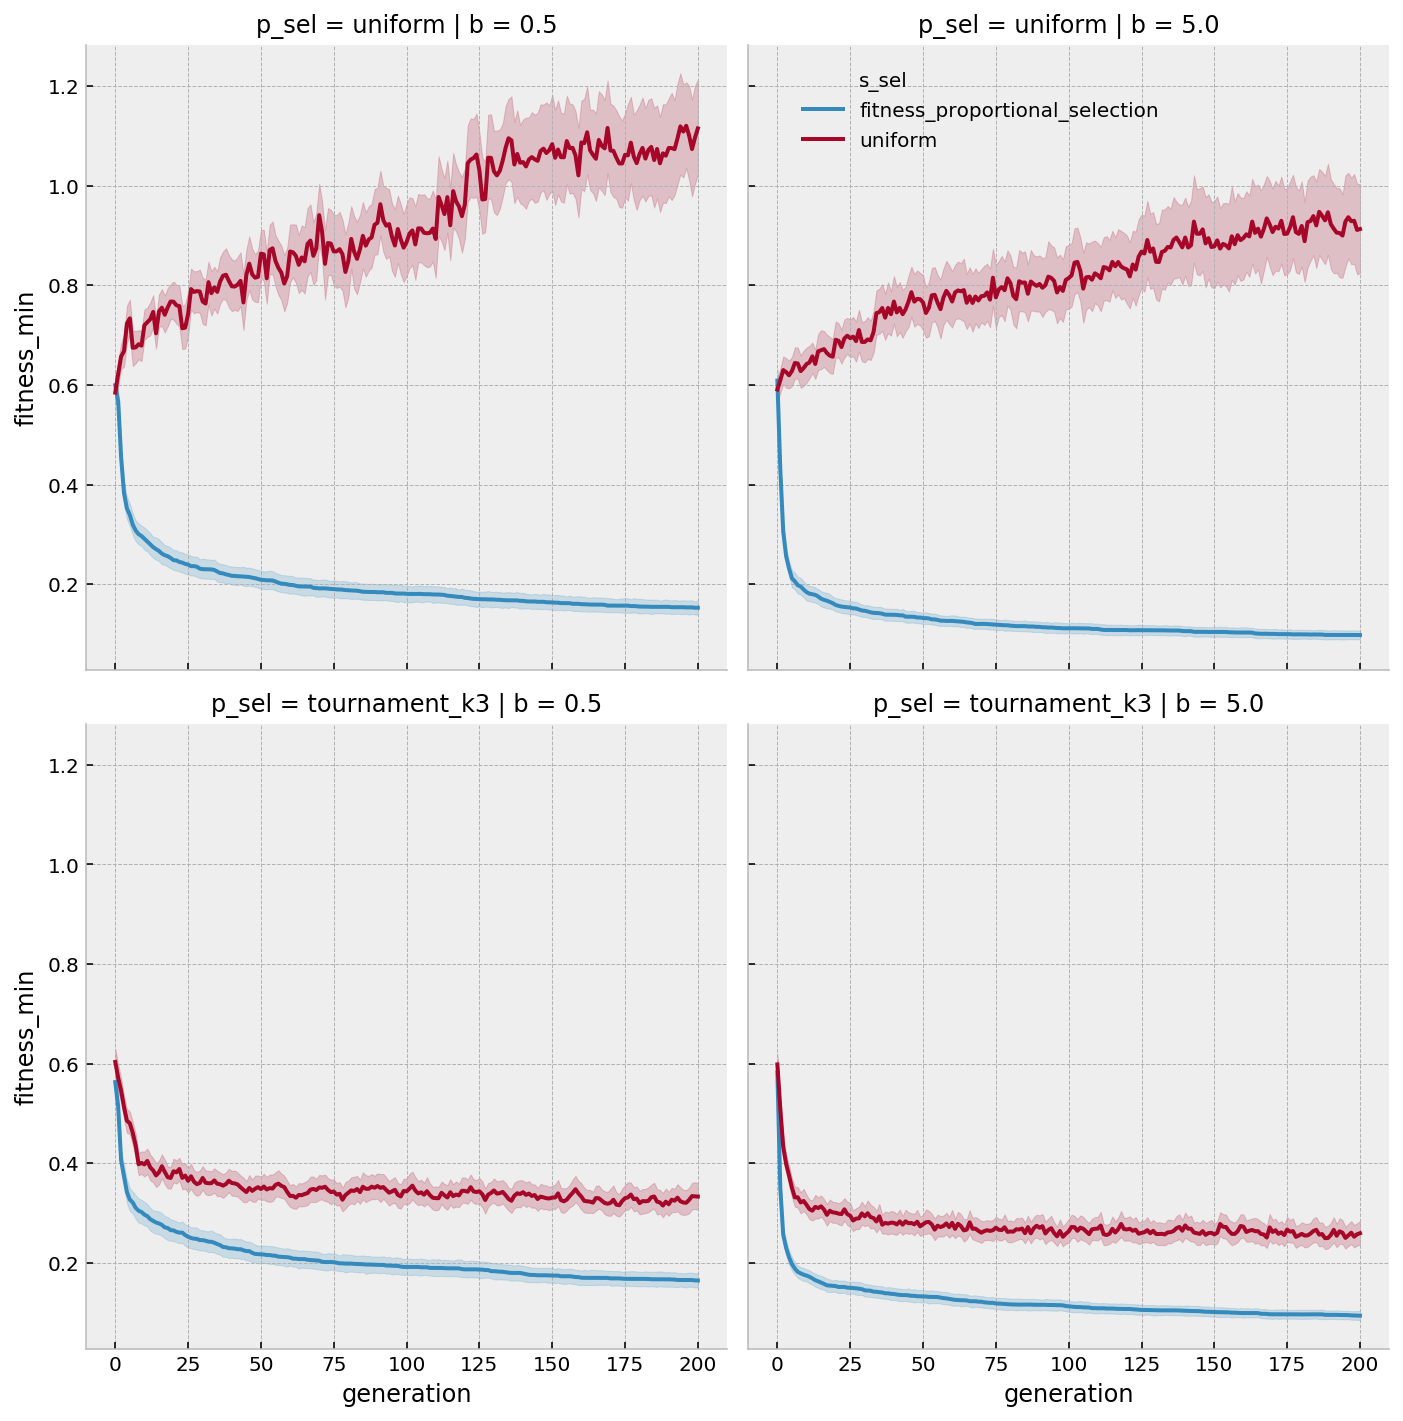

In [10]:
%%time
hue = "s_sel"
g = sns.relplot(
    x="generation",
    y="fitness_min",
    col="b",
    row="p_sel",
    hue=hue,
    kind="line",
    data=multi_fit[multi_fit["pop_s"] == 160],
)

leg = g._legend
leg.set_bbox_to_anchor([0.65, 0.95])
leg._loc = 1

## Final minimum (best) fitness distribution

Histogram of minimum (best) fitness of final population

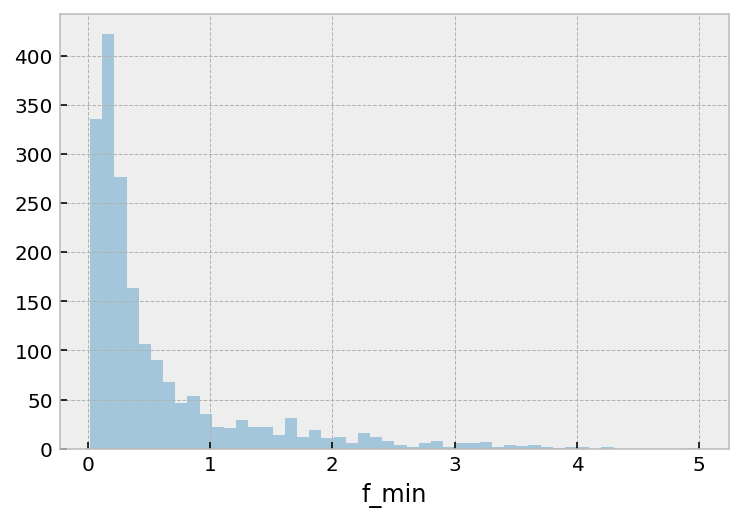

In [11]:
sns.distplot(doe["f_min"], rug=False, kde=False)

Minimum fitness vs standard deviation (final population)

In [ ]:
hexplot = sns.jointplot(x="f_min", y="f_std", kind="hex", data=doe)
# shrink fig so cbar is visible
plt.subplots_adjust(left=0.1, right=0.8, top=0.8, bottom=0.1)
# make new ax object for the cbar
cbar_ax = hexplot.fig.add_axes([0.85, 0.1, 0.02, 0.6])  # x, y, width, height
cbar = plt.colorbar(cax=cbar_ax)
cbar.set_label("count")
plt.show()

In [ ]:
query = (doe["f_min"] < 0.8) & (doe["f_std"] < 0.2)
hexplot = sns.jointplot(
    x="f_min", y="f_std", kind="hex", joint_kws=dict(gridsize=20), data=doe[query]
)
# shrink fig so cbar is visible
plt.subplots_adjust(left=0.1, right=0.8, top=0.8, bottom=0.1)
# make new ax object for the cbar
cbar_ax = hexplot.fig.add_axes([0.85, 0.1, 0.02, 0.6])  # x, y, width, height
cbar = plt.colorbar(cax=cbar_ax)
cbar.set_label("count")
plt.show()

Minimum fitness vs mean fitness (final population)

In [ ]:
hexplot = sns.jointplot(x="f_min", y="f_mean", kind="hex", data=doe)
# shrink fig so cbar is visible
plt.subplots_adjust(left=0.1, right=0.8, top=0.8, bottom=0.1)
# make new ax object for the cbar
cbar_ax = hexplot.fig.add_axes([0.85, 0.1, 0.02, 0.6])  # x, y, width, height
cbar = plt.colorbar(cax=cbar_ax)
cbar.set_label("count")
plt.show()

In [ ]:
query = (doe["f_min"] < 0.8) & (doe["f_mean"] < 0.8)
hexplot = sns.jointplot(
    x="f_min", y="f_mean", kind="hex", joint_kws=dict(gridsize=20), data=doe[query]
)
# shrink fig so cbar is visible
plt.subplots_adjust(left=0.1, right=0.8, top=0.8, bottom=0.1)
# make new ax object for the cbar
cbar_ax = hexplot.fig.add_axes([0.85, 0.1, 0.02, 0.6])  # x, y, width, height
cbar = plt.colorbar(cax=cbar_ax)
cbar.set_label("count")
plt.show()

# DOE Analisis of Data

In [16]:
list(doe.columns[0:6])

['pop_s', 'b', 'mut_p', 'mut_s', 'p_sel', 's_sel']

## Defining variables and variable labels

In [17]:
labels = {}
labels[1] = list(doe.columns[0:6])
for i in [2, 3, 4, 5, 6]:
    labels[i] = list(it.combinations(labels[1], i))

obs_list = list(doe.columns[-4:-1])

for k in labels.keys():
    print(str(k) + " : " + str(labels[k]))
print()
print(obs_list)

1 : ['pop_s', 'b', 'mut_p', 'mut_s', 'p_sel', 's_sel']
2 : [('pop_s', 'b'), ('pop_s', 'mut_p'), ('pop_s', 'mut_s'), ('pop_s', 'p_sel'), ('pop_s', 's_sel'), ('b', 'mut_p'), ('b', 'mut_s'), ('b', 'p_sel'), ('b', 's_sel'), ('mut_p', 'mut_s'), ('mut_p', 'p_sel'), ('mut_p', 's_sel'), ('mut_s', 'p_sel'), ('mut_s', 's_sel'), ('p_sel', 's_sel')]
3 : [('pop_s', 'b', 'mut_p'), ('pop_s', 'b', 'mut_s'), ('pop_s', 'b', 'p_sel'), ('pop_s', 'b', 's_sel'), ('pop_s', 'mut_p', 'mut_s'), ('pop_s', 'mut_p', 'p_sel'), ('pop_s', 'mut_p', 's_sel'), ('pop_s', 'mut_s', 'p_sel'), ('pop_s', 'mut_s', 's_sel'), ('pop_s', 'p_sel', 's_sel'), ('b', 'mut_p', 'mut_s'), ('b', 'mut_p', 'p_sel'), ('b', 'mut_p', 's_sel'), ('b', 'mut_s', 'p_sel'), ('b', 'mut_s', 's_sel'), ('b', 'p_sel', 's_sel'), ('mut_p', 'mut_s', 'p_sel'), ('mut_p', 'mut_s', 's_sel'), ('mut_p', 'p_sel', 's_sel'), ('mut_s', 'p_sel', 's_sel')]
4 : [('pop_s', 'b', 'mut_p', 'mut_s'), ('pop_s', 'b', 'mut_p', 'p_sel'), ('pop_s', 'b', 'mut_p', 's_sel'), ('pop_s'

## Computing Main and Interaction Effects

### Constant Effect

In [18]:
effects = {}

# Start with the constant effect: this is $\overline{y}$
effects[0] = {"x0": [doe["f_min"].mean(), doe["f_max"].mean(), doe["f_mean"].mean()]}
print(effects[0])

{'x0': [0.584447695187028, 1.565170785962909, 0.929534797232247]}


### Main effect of each variable

In [19]:
effects[1] = {}
for key in labels[1]:
    effects_result = []
    for obs in obs_list:
        effects_df = doe.groupby(key)[obs].mean()
        result = sum([zz * effects_df.loc[zz] for zz in effects_df.index])
        effects_result.append(result)
    effects[1][key] = effects_result

effects[1]

{'pop_s': [-0.3862818280506419, 0.5559598388094942, -0.12511045905410045],
 'b': [-0.1362169161430371, 0.13805234252149057, -0.05773867439923519],
 'mut_p': [-0.08589621349562038, 0.4590032994694153, 0.13963658304688398],
 'mut_s': [-0.008198548915714365, 0.8398290125982941, 0.2978828313189027],
 'p_sel': [-0.5389279047187536, -0.9609279367853356, -0.8596543233666658],
 's_sel': [0.7824668241951982, 2.222143259900403, 1.4538450528413451]}

### Interaction effects (2-variable to 6-variable interactions)

In [20]:
for c in [2, 3, 4, 5, 6]:
    effects[c] = {}
    for key in labels[c]:
        effects_result = []
        for obs in obs_list:
            effects_df = doe.groupby(key)[obs].mean()
            result = sum(
                [
                    np.prod(zz) * effects_df.loc[zz] / (2 ** (len(zz) - 1))
                    for zz in effects_df.index
                ]
            )
            effects_result.append(result)
        effects[c][key] = effects_result

C:\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


In [21]:
def printd(d):
    for k in d.keys():
        print("%25s : %s" % (k, d[k]))


for i in range(1, 7):
    printd(effects[i])

                    pop_s : [-0.3862818280506419, 0.5559598388094942, -0.12511045905410045]
                        b : [-0.1362169161430371, 0.13805234252149057, -0.05773867439923519]
                    mut_p : [-0.08589621349562038, 0.4590032994694153, 0.13963658304688398]
                    mut_s : [-0.008198548915714365, 0.8398290125982941, 0.2978828313189027]
                    p_sel : [-0.5389279047187536, -0.9609279367853356, -0.8596543233666658]
                    s_sel : [0.7824668241951982, 2.222143259900403, 1.4538450528413451]
           ('pop_s', 'b') : [0.035951784568114986, 0.11581745775971775, 0.04608671644997575]
       ('pop_s', 'mut_p') : [0.024301414988275094, 0.12136834289862064, 0.026809708654114084]
       ('pop_s', 'mut_s') : [-0.03880994503091581, 0.23634087946811477, 0.019408470018847768]
       ('pop_s', 'p_sel') : [0.1820608065695231, -0.07237923861560358, -0.007032824944307375]
       ('pop_s', 's_sel') : [-0.25450742170560137, 0.31455518187525056, 0.00

## Analysis

### Analyzing Effects

In [22]:
print(len(effects))

7


In [23]:
master_dict = {}
for nvars in effects.keys():

    effect = effects[nvars]
    for k in effect.keys():
        v = effect[k]
        master_dict[k] = v

master_df = pd.DataFrame(master_dict).T
master_df.columns = obs_list
master_df.head()

,f_min,f_max,f_mean
x0,0.584448,1.565171,0.929535
pop_s,-0.386282,0.555960,-0.125110
b,-0.136217,0.138052,-0.057739
mut_p,-0.085896,0.459003,0.139637
mut_s,-0.008199,0.839829,0.297883


In [24]:
n = 30
k = 6

y1 = master_df[["f_min"]].copy()
y1 = y1.iloc[y1["f_min"].abs().argsort].iloc[::-1]
y1 = y1.drop("x0")
y1.columns = ["Effects_Estimate"]
y1.index.names = ["Factors"]
y1["Sum_of_Squares"] = y1["Effects_Estimate"] ** 2 * n * (2 ** (k - 2))

SS_tot = (doe["f_min"] ** 2).sum() - ((doe["f_min"].sum() ** 2) / len(doe["f_min"]))
SS_err = SS_tot - (y1["Sum_of_Squares"].sum())
y1["%_Contribution"] = y1["Sum_of_Squares"] / SS_tot * 100

In [25]:
y1.loc["Error"] = [None, SS_err, SS_err / SS_tot * 100]
y1.loc["Total"] = [None, SS_tot, SS_tot / SS_tot * 100]
y1.loc["Model"] = [None, SS_tot - SS_err, (SS_tot - SS_err) / SS_tot * 100]

Top 10 effects for observable 'minimum fitness (final population)':

In [26]:
y1.iloc[np.r_[-1, 0:9, -3, -2]]

,Effects_Estimate,Sum_of_Squares,%_Contribution
Factors,,,
Model,NaN,778.569313,77.455152
s_sel,0.782467,293.882079,29.236551
"(p_sel, s_sel)",-0.540990,140.481887,13.975693
p_sel,-0.538928,139.412778,13.869334
pop_s,-0.386282,71.622552,7.125295
"(pop_s, s_sel)",-0.254507,31.091533,3.093109
"(pop_s, p_sel)",0.182061,15.910146,1.582804
"(pop_s, p_sel, s_sel)",0.180103,15.569835,1.548949
"(mut_s, p_sel)",0.164312,12.959180,1.289230


### ANOVA Analysis

ANOVA Analysis with F statistics (significance level 5%)

In [27]:
ANOVA_y1 = y1.copy()
ANOVA_y1 = ANOVA_y1.drop("Effects_Estimate", axis=1)
ANOVA_y1["Dgrs. Freedom"] = 1
df_tot = len(doe["f_min"]) - 1
df_err = df_tot - len(master_df)

ANOVA_y1["Mean Sqrs"] = ANOVA_y1["Sum_of_Squares"] / 1
ms_err = SS_err / df_err

ANOVA_y1["F ratio"] = ANOVA_y1["Mean Sqrs"] / ms_err
sig_level = 0.05
ANOVA_y1["F critical"] = stats.f.ppf(q=1 - sig_level, dfn=1, dfd=df_tot)
ANOVA_y1["Significant"] = ANOVA_y1["F ratio"] > ANOVA_y1["F critical"]

In [28]:
df_show = ANOVA_y1.iloc[np.r_[-1, 0:10, -3, -2]]
df_show

,Sum_of_Squares,%_Contribution,Dgrs. Freedom,Mean Sqrs,F ratio,F critical,Significant
Factors,,,,,,,
Model,778.569313,77.455152,1,778.569313,6373.044095,3.846309,True
s_sel,293.882079,29.236551,1,293.882079,2405.596285,3.846309,True
"(p_sel, s_sel)",140.481887,13.975693,1,140.481887,1149.926209,3.846309,True
p_sel,139.412778,13.869334,1,139.412778,1141.174926,3.846309,True
pop_s,71.622552,7.125295,1,71.622552,586.272380,3.846309,True
"(pop_s, s_sel)",31.091533,3.093109,1,31.091533,254.502341,3.846309,True
"(pop_s, p_sel)",15.910146,1.582804,1,15.910146,130.233827,3.846309,True
"(pop_s, p_sel, s_sel)",15.569835,1.548949,1,15.569835,127.448182,3.846309,True
"(mut_s, p_sel)",12.959180,1.289230,1,12.959180,106.078446,3.846309,True


### Main effects plot

Colors represent if factor is in the top 3 (green), top 5 (blue), top 10 (yellow)

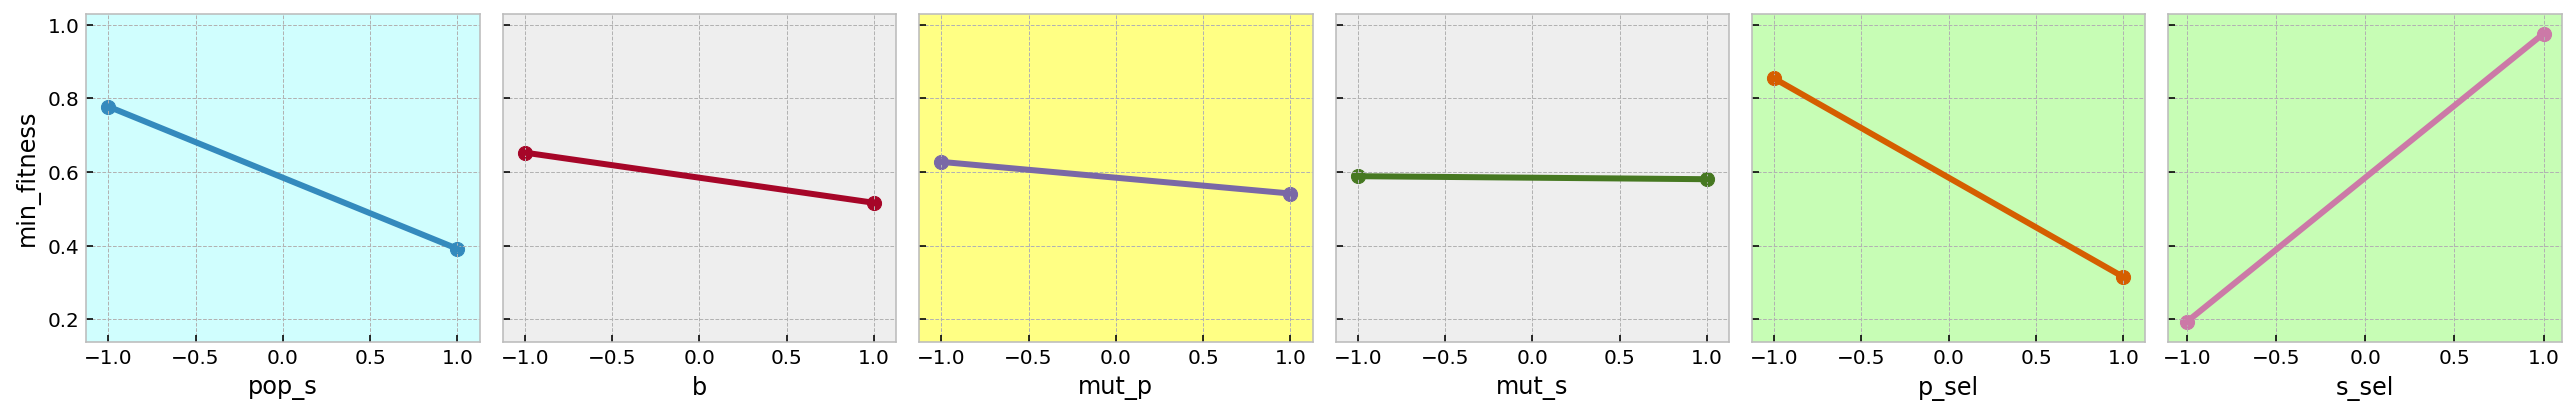

In [29]:
variable = ["pop_s", "b", "mut_p", "mut_s", "p_sel", "s_sel"]
f, axs = plt.subplots(1, 6, figsize=(18, 3), sharey=True)
x_ci = None
for i in range(len(variable)):
    sns.regplot(
        x=variable[i],
        y="f_min",
        data=doe,
        x_estimator=np.mean,
        x_ci=x_ci,
        ci=None,
        truncate=True,
        ax=axs[i],
    )
for ax in axs.flat:
    ax.set_ylabel(None)
axs[0].set_ylabel("min_fitness")

# Top 3
axs[5].set_facecolor("xkcd:pale green")
axs[4].set_facecolor("xkcd:pale green")

# Top 5
axs[0].set_facecolor("xkcd:pale blue")

# Top 10
axs[2].set_facecolor("xkcd:pale yellow")

plt.tight_layout()

### Interaction effects plot

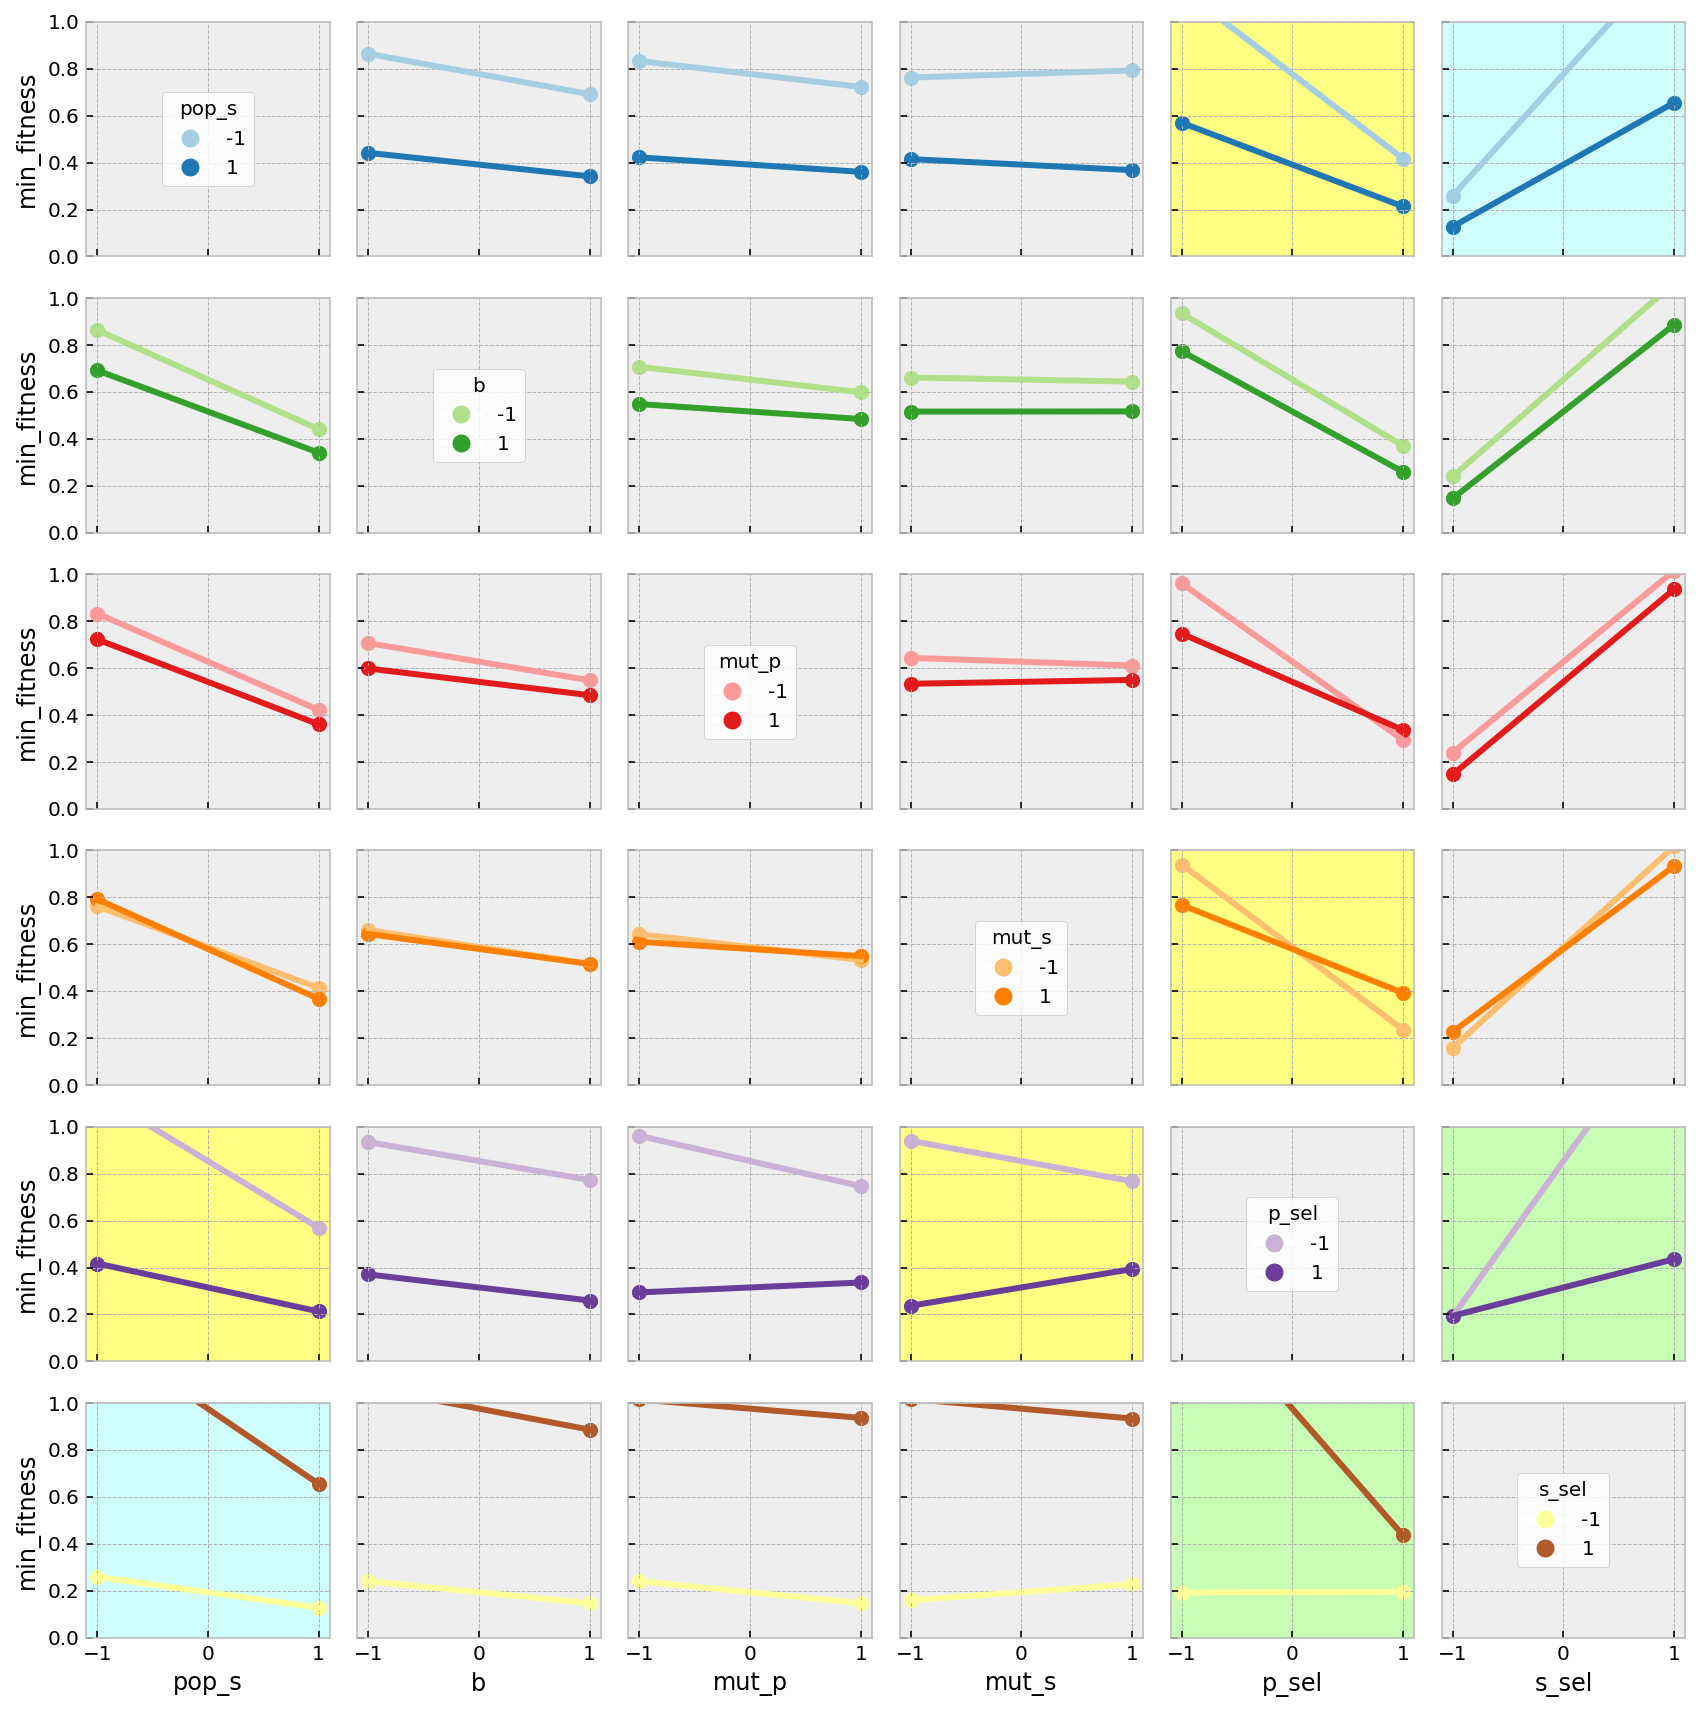

Wall time: 47.4 s


In [30]:
%%time
factors = ["pop_s", "b", "mut_p", "mut_s", "p_sel", "s_sel"]
f, axs = plt.subplots(6, 6, figsize=(12, 12), sharey=True, sharex=True)
x_ci = None

# set palette
palette = it.cycle(sns.color_palette("Paired"))

for i in range(len(factors)):
    for j in range(len(factors)):
        yy = factors[j]

        c = next(palette)
        sns.regplot(
            x=factors[i],
            y="f_min",
            data=doe[doe[yy] == -1],
            label="-1",
            x_estimator=np.mean,
            color=c,
            x_ci=x_ci,
            ci=None,
            truncate=True,
            ax=axs[j, i],
        )
        c = next(palette)
        sns.regplot(
            x=factors[i],
            y="f_min",
            data=doe[doe[yy] == 1],
            label="1",
            x_estimator=np.mean,
            color=c,
            x_ci=x_ci,
            ci=None,
            truncate=True,
            ax=axs[j, i],
        )

        # axs[j,i].legend(title=yy,facecolor='white')

        if i == j:
            axs[j, i].clear()

for ax in axs.flat:
    ax.set_ylabel(None)
    ax.set_xlabel(None)

axs[0, 0].set_xlim((-1.1, 1.1))
axs[0, 0].set_ylim((0, 1))


for i in range(len(factors)):
    axs[i, 0].set_ylabel("min_fitness")
    axs[-1, i].set_xlabel(factors[i])
    legend_elements = [
        mpl.lines.Line2D(
            [0],
            [0],
            marker="o",
            color="w",
            label=-1,
            markerfacecolor=next(palette),
            markersize=10,
        ),
        mpl.lines.Line2D(
            [0],
            [0],
            marker="o",
            color="w",
            label=1,
            markerfacecolor=next(palette),
            markersize=10,
        ),
    ]
    axs[i, i].legend(
        handles=legend_elements, loc="center", title=factors[i], facecolor="white"
    )

# Top 3
axs[4, 5].set_facecolor("xkcd:pale green")
axs[5, 4].set_facecolor("xkcd:pale green")

# Top 5
axs[0, 5].set_facecolor("xkcd:pale blue")
axs[5, 0].set_facecolor("xkcd:pale blue")

# Top 10
axs[0, 4].set_facecolor("xkcd:pale yellow")
axs[4, 0].set_facecolor("xkcd:pale yellow")
axs[3, 4].set_facecolor("xkcd:pale yellow")
axs[4, 3].set_facecolor("xkcd:pale yellow")

plt.tight_layout()
plt.show()

### Normal probability plots of the effects

Quantify which effects are not normally distributed, to assist in identifying important variables.

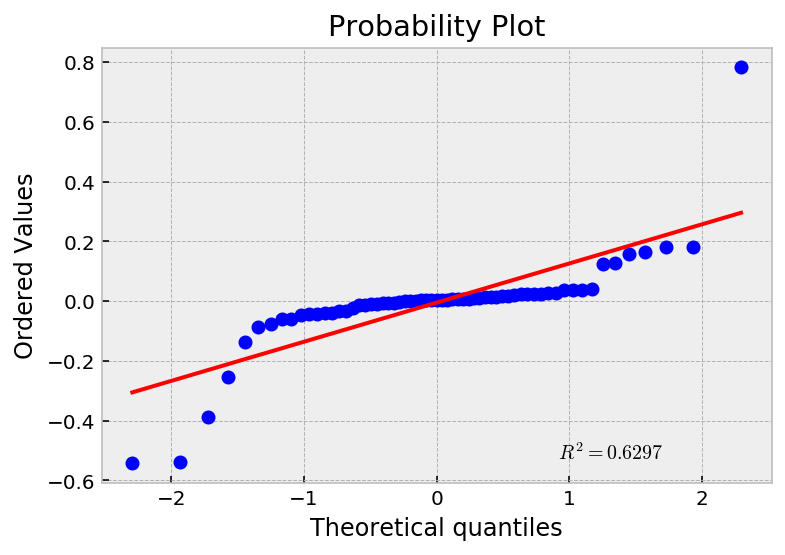

In [31]:
fig, ax = plt.subplots()

stats.probplot(y1.iloc[0:-3]["Effects_Estimate"], dist="norm", rvalue=True, plot=ax)
plt.show()